# 1. PROBLEM 1

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

In [17]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [18]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


# 2.Exploratory Data Analysis

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [20]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [21]:
df.shape

(210, 7)

In [22]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [23]:
df.duplicated().sum()

0

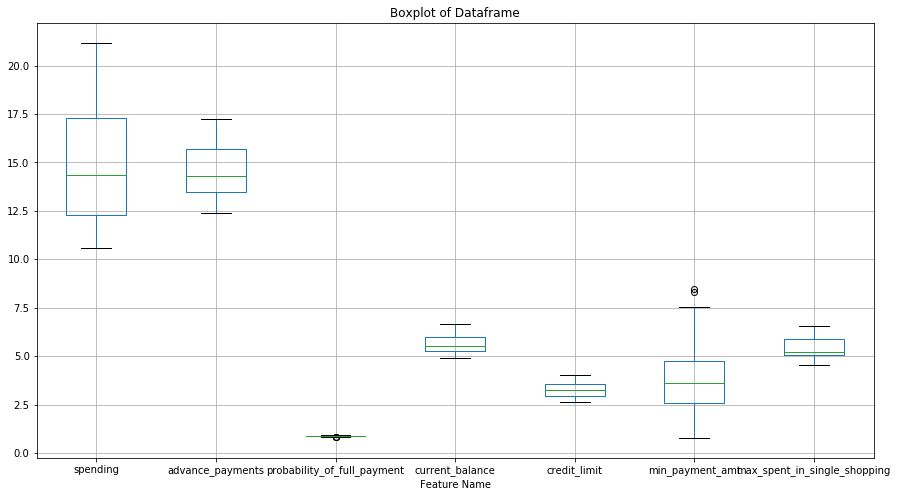

In [15]:
plt.figure(figsize = (15,8))
plt.grid()
plt.title('Boxplot of Dataframe')
plt.xlabel('Feature Name')
df.boxplot()
plt.savefig('q1_boxplot of whole dataset.png')

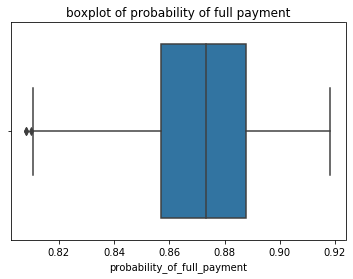

In [11]:
sns.boxplot(df['probability_of_full_payment'])
plt.title('boxplot of probability of full payment')
plt.savefig('q1_boxplot of probability of full payment')

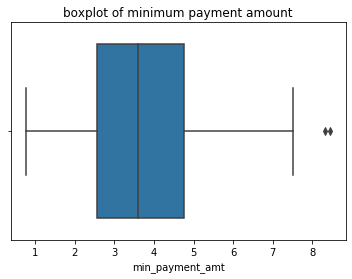

In [88]:
sns.boxplot(df['min_payment_amt'])
plt.title('boxplot of minimum payment amount')
plt.savefig('q1_boxplot of minimun payment amount.png')

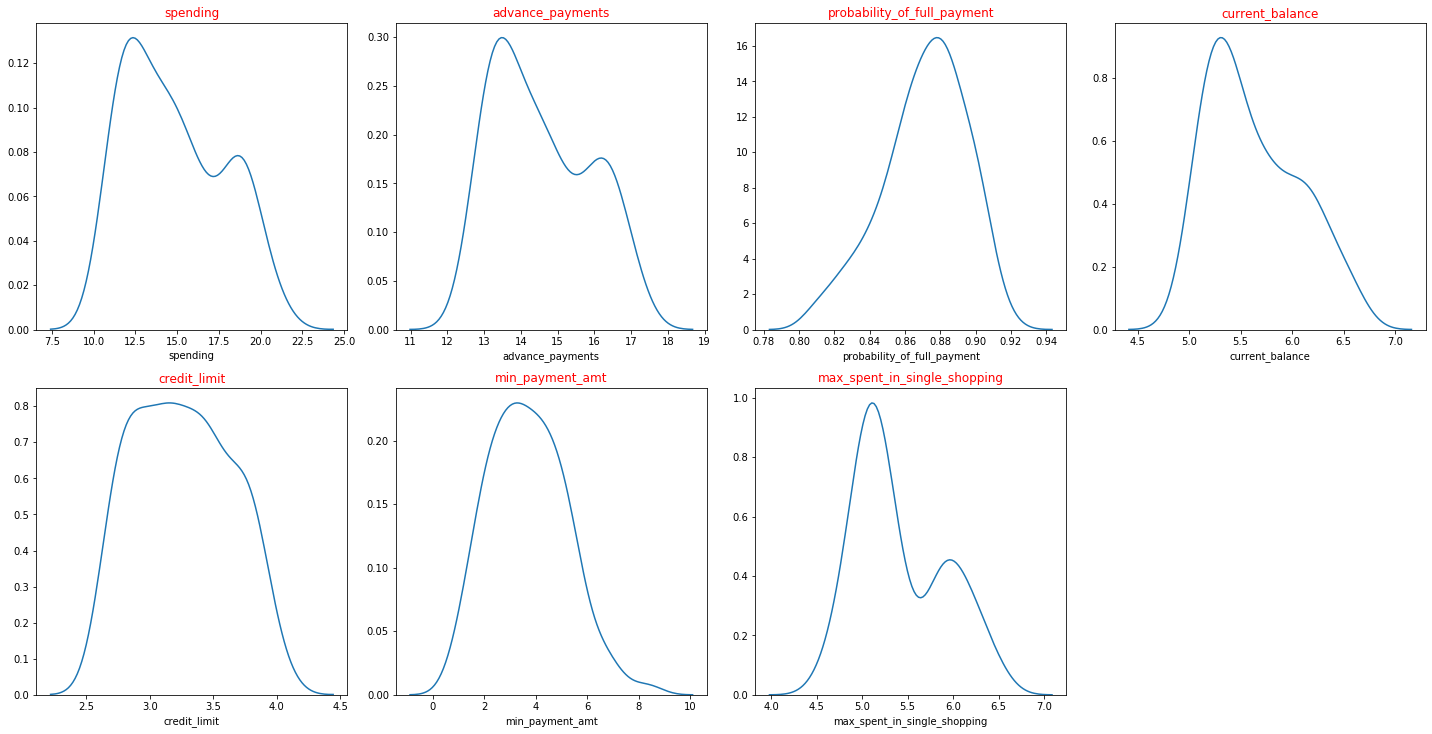

In [10]:
dist_plot=df
fig=plt.figure(figsize=(20,20))
for i in range(0,len(dist_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(dist_plot[dist_plot.columns[i]],hist=False)
    ax.set_title(dist_plot.columns[i],color='Red')
plt.tight_layout()
plt.savefig('q1_displots for all the variables')
plt.show()

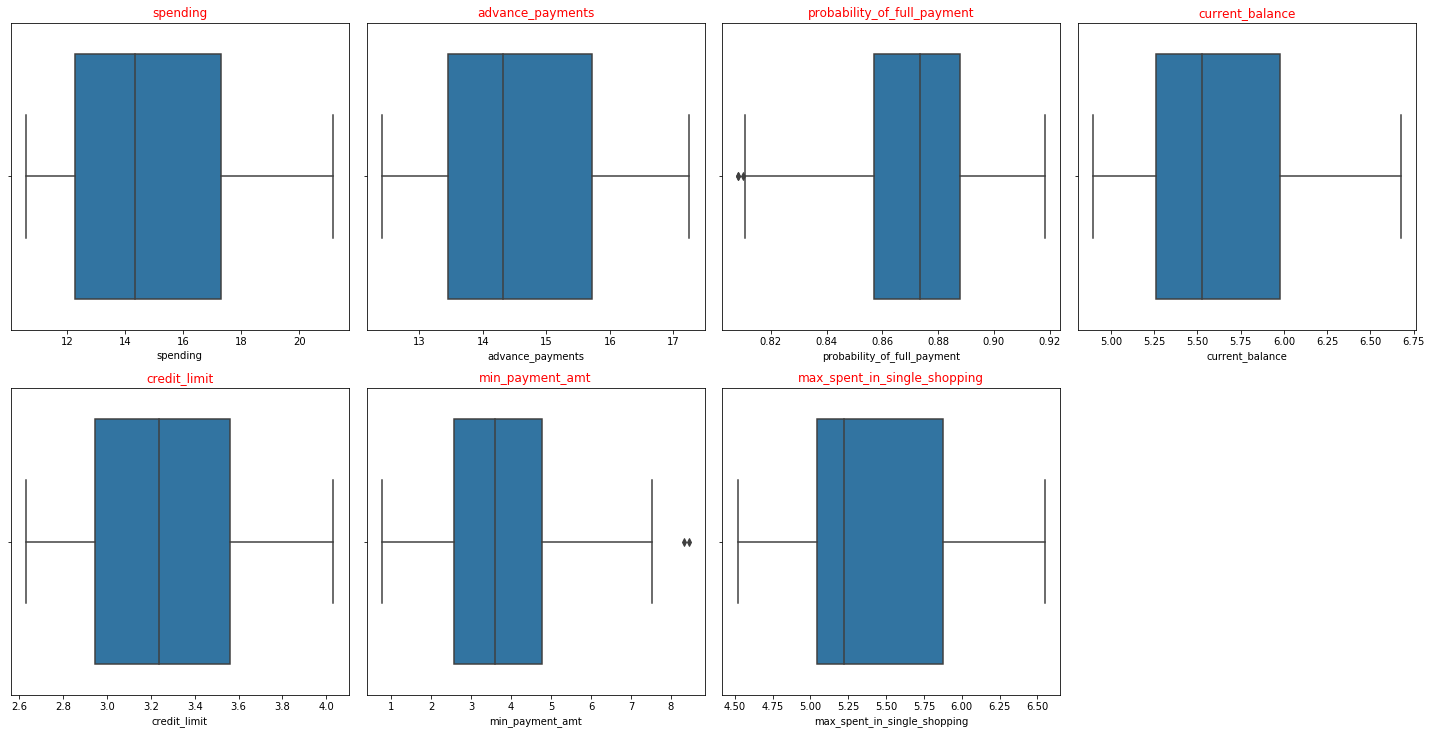

In [11]:
box_plot=df
fig=plt.figure(figsize=(20,20))
for i in range(0,len(box_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(box_plot[box_plot.columns[i]])
    ax.set_title(box_plot.columns[i],color='Red')
plt.tight_layout()
plt.savefig('q1_boxplot of all the variables')
plt.show()

# removing outliers


In [12]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [13]:
for feature in df[['probability_of_full_payment','min_payment_amt']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

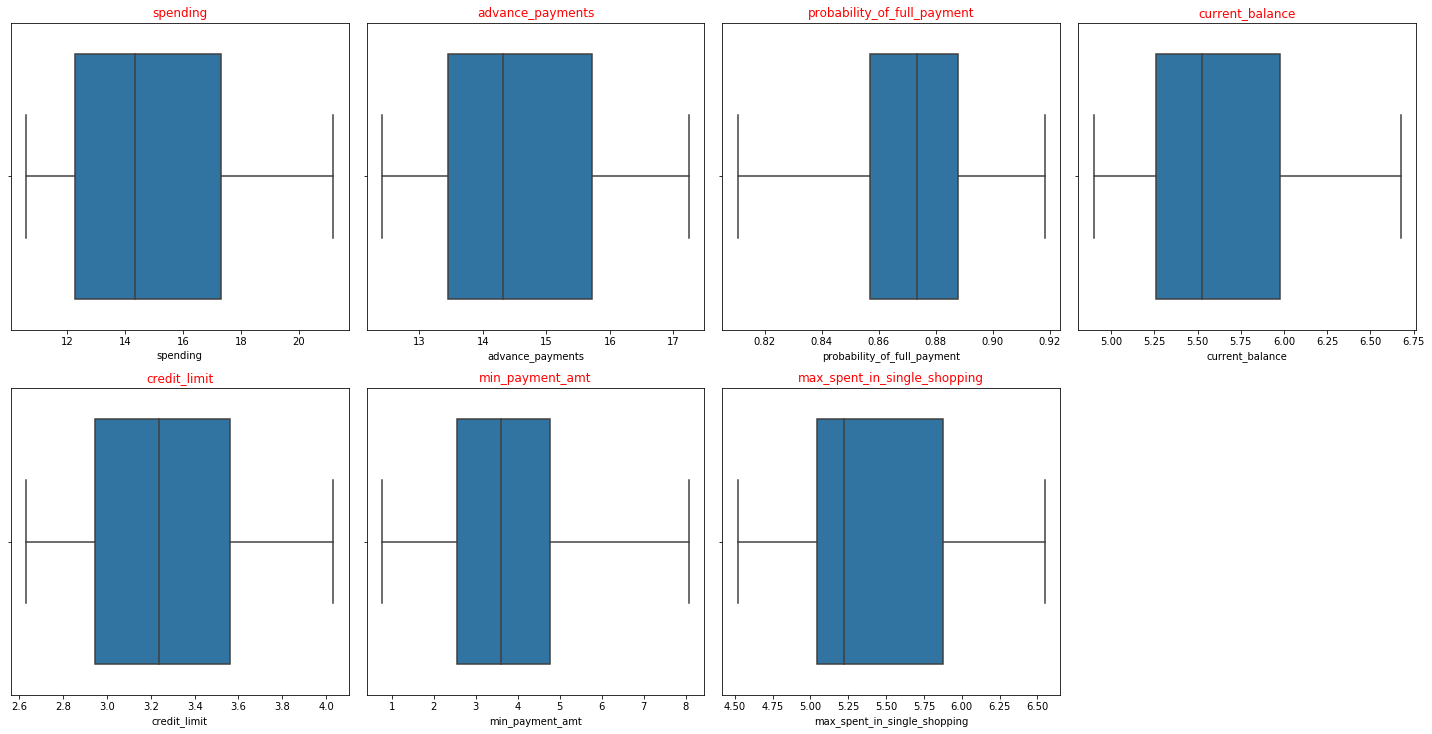

In [14]:
box_plot=df
fig=plt.figure(figsize=(20,20))
for i in range(0,len(box_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(box_plot[box_plot.columns[i]])
    ax.set_title(box_plot.columns[i],color='Red')
plt.tight_layout()
plt.savefig('q1_boxplot of all the variables')
plt.show()

In [15]:
df.cov()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,8.466351,3.778443,0.041742,1.224704,1.066911,-0.998633,1.235133
advance_payments,3.778443,1.705528,0.016305,0.562666,0.466065,-0.423684,0.571753
probability_of_full_payment,0.041742,0.016305,0.000555,0.003846,0.006783,-0.011799,0.002630
current_balance,1.224704,0.562666,0.003846,0.196305,0.143992,-0.113046,0.203125
credit_limit,1.066911,0.466065,0.006783,0.143992,0.142668,-0.146211,0.139068
min_payment_amt,-0.998633,-0.423684,-0.011799,-0.113046,-0.146211,2.234095,-0.007056
max_spent_in_single_shopping,1.235133,0.571753,0.002630,0.203125,0.139068,-0.007056,0.241553


In [16]:
df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.522793
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.360001
max_spent_in_single_shopping    0.561897
dtype: float64

In [17]:
df.corr(method='pearson')

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608900,0.949985,0.970771,-0.229619,0.863693
advance_payments,0.994341,1.000000,0.529925,0.972422,0.944829,-0.217051,0.890784
probability_of_full_payment,0.608900,0.529925,1.000000,0.368419,0.762218,-0.335071,0.227140
current_balance,0.949985,0.972422,0.368419,1.000000,0.860415,-0.170701,0.932806
credit_limit,0.970771,0.944829,0.762218,0.860415,1.000000,-0.258980,0.749131
min_payment_amt,-0.229619,-0.217051,-0.335071,-0.170701,-0.258980,1.000000,-0.009605
max_spent_in_single_shopping,0.863693,0.890784,0.227140,0.932806,0.749131,-0.009605,1.000000


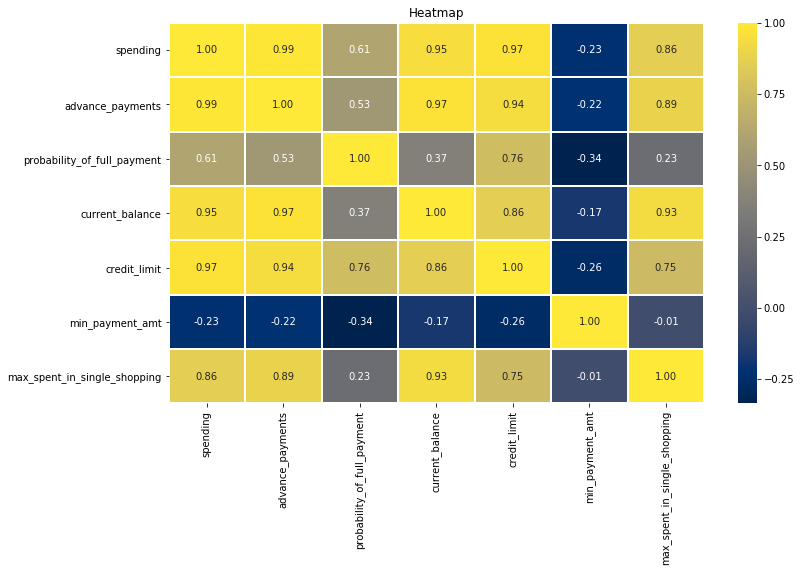

In [18]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,fmt='.2f', cmap='cividis',  linewidths=1)
plt.title('Heatmap')
plt.savefig('q1_heatmap.png')

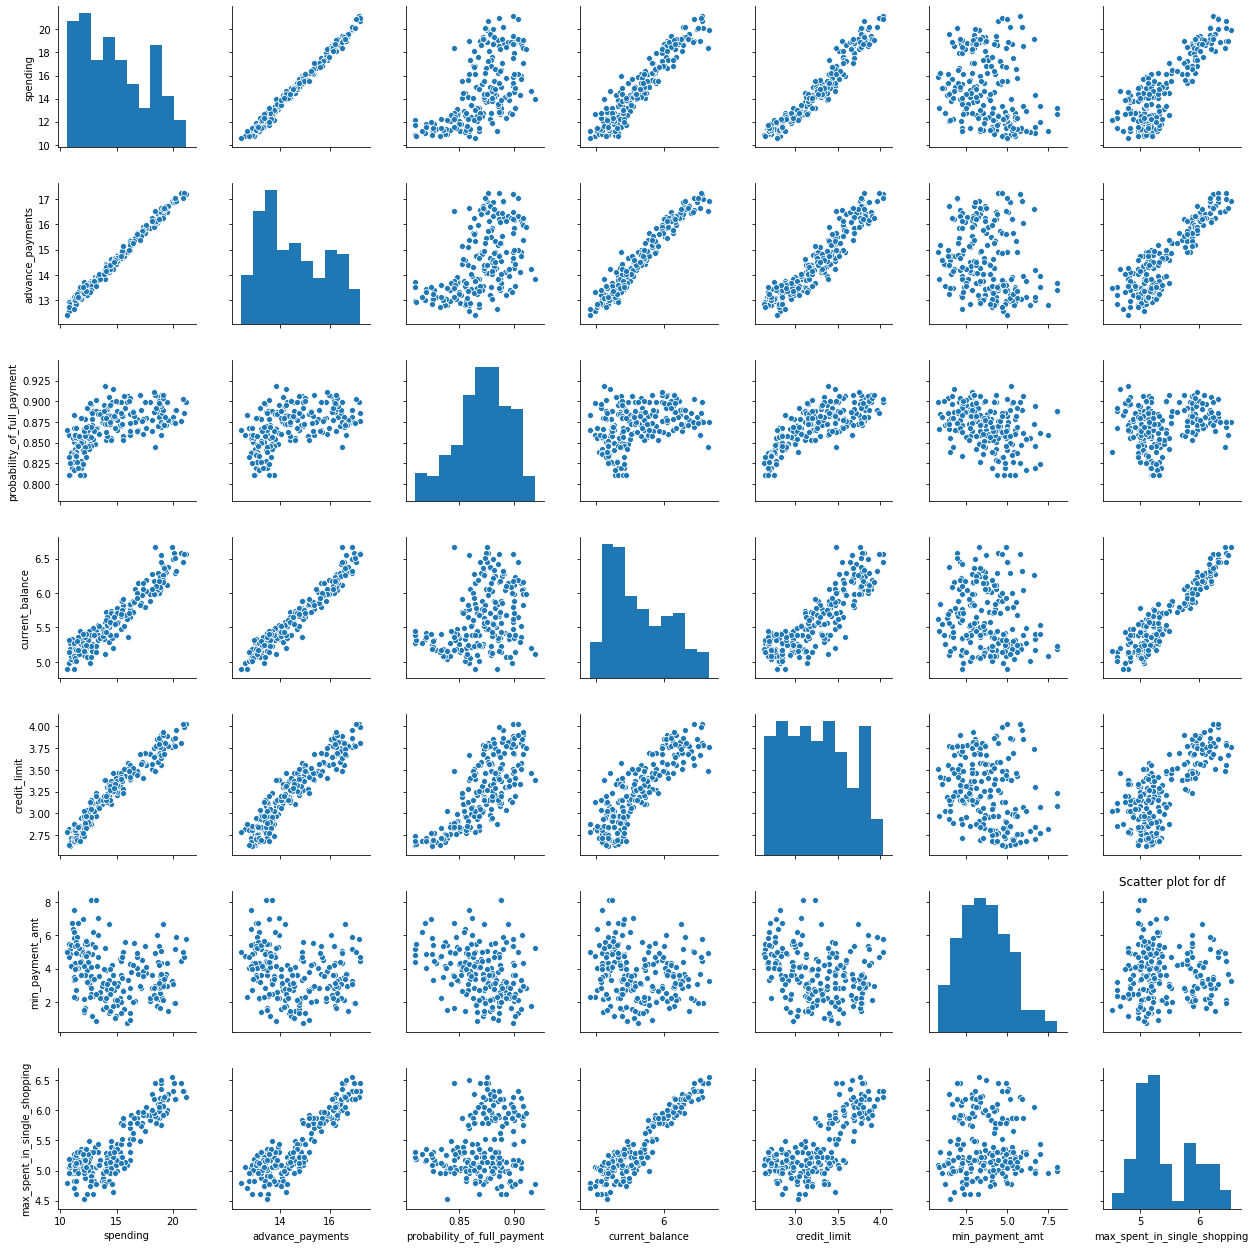

In [19]:
sns.pairplot(df, kind = 'scatter')
plt.title('Scatter plot for df')
plt.savefig('q1_(scatter type)pair plot.png')

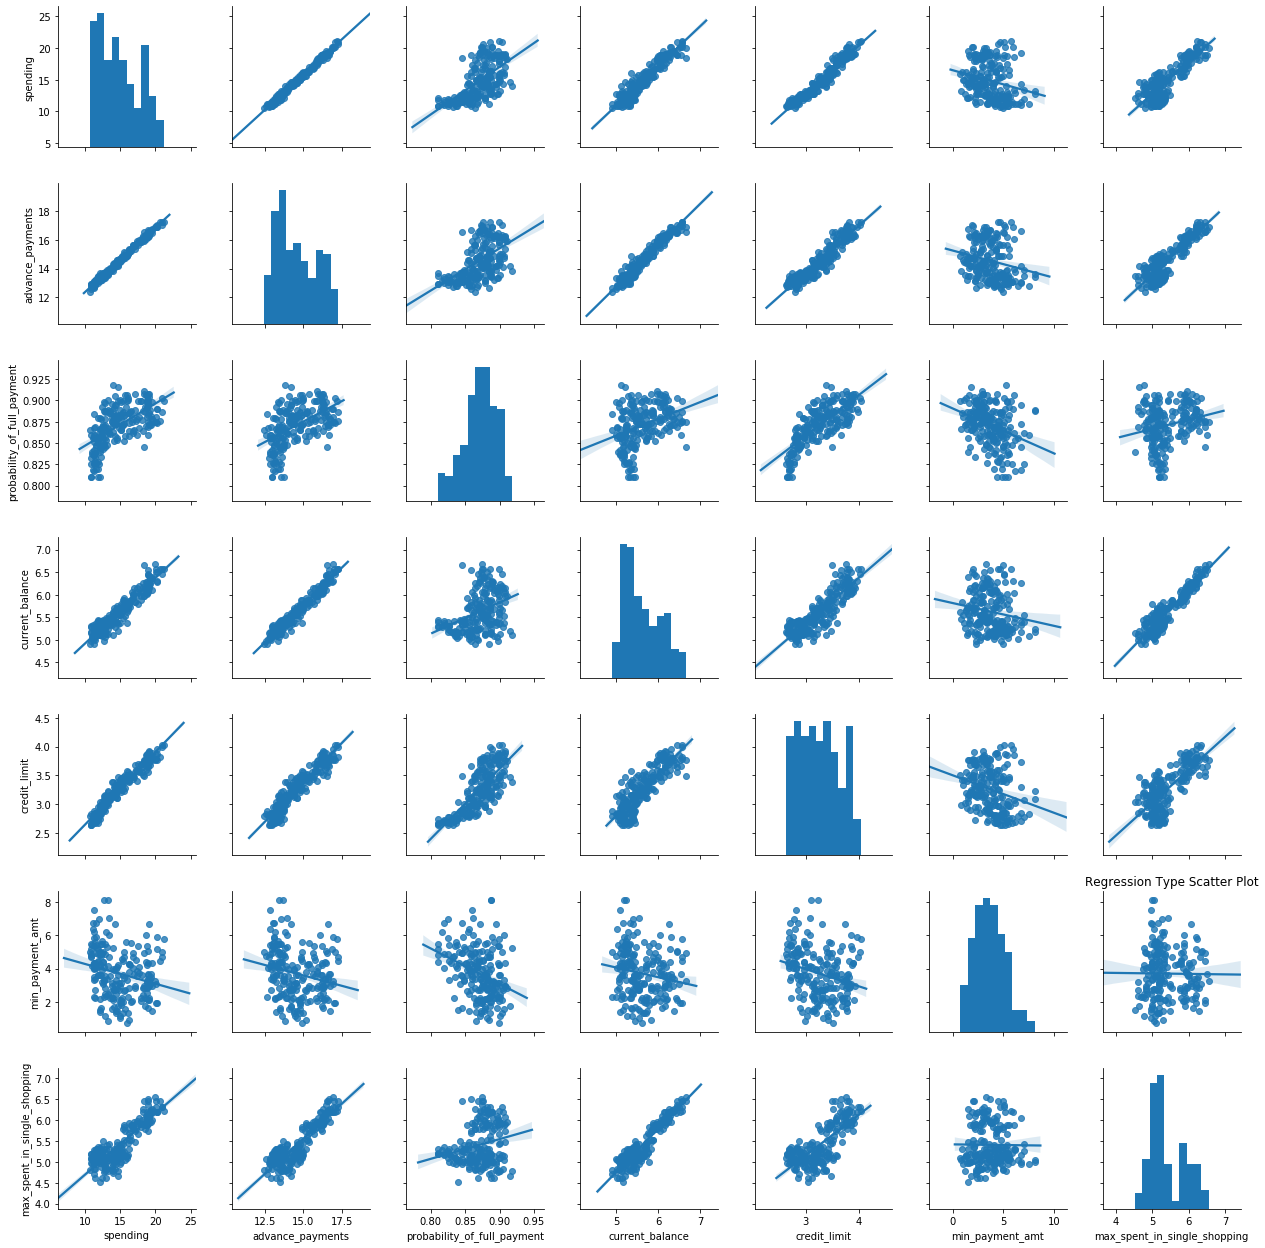

In [20]:
sns.pairplot(df, kind='reg')
plt.title('Regression Type Scatter Plot')
plt.savefig('q1_(regression kind)pair plot.png')

# 3.Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
X = StandardScaler()
df1 = X.fit_transform(df)

In [23]:
df1

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [24]:
df2 = pd.DataFrame(df1, index = df.index, columns = df.columns)

In [25]:
df2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


# 4.Hierarchial Clustering (Aglomerative)

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [27]:
h_clust = linkage(df2, method = 'ward')

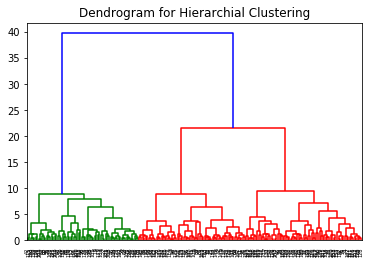

In [28]:
dend = dendrogram(h_clust)
plt.title('Dendrogram for Hierarchial Clustering')
plt.savefig('q1_dendrogram for Hierarchial clustering.png')

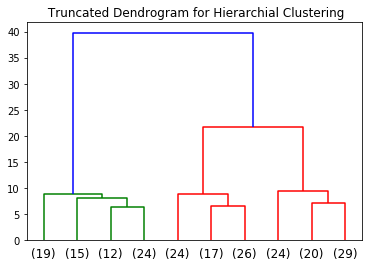

In [29]:
dend = dendrogram(h_clust, truncate_mode = 'lastp', p= 10)
plt.title(' Truncated Dendrogram for Hierarchial Clustering')
plt.savefig('q1_dendrogram(Truncated) for Hierarchial clustering.png')

In [30]:
from scipy.cluster.hierarchy import fcluster

In [31]:
clusters1 = fcluster(h_clust, 3, criterion = 'maxclust')
clusters1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [32]:
clusters2 = fcluster(h_clust, 20, criterion = 'distance')
clusters2

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [33]:
np.array_equal(clusters1, clusters2)

True

In [34]:
hierarchial_df = df

In [35]:
hierarchial_df['h_cluster'] = clusters1

In [36]:
hierarchial_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,h_cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [79]:
aggdata=df.iloc[:,1:8].groupby('h_cluster').mean()
aggdata['Freq']=df.h_cluster.value_counts().sort_index()
aggdata

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
h_cluster,,,,,,,
1,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [53]:
hierarchial_df.to_csv('Hierarchial_clustering_output.csv')

# 5. K-means Clustering

In [59]:
df3 = hierarchial_df.drop('h_cluster',axis=1)

In [60]:
from sklearn.cluster import KMeans

In [61]:
wss = []

In [62]:
for i in range(1,10):
    KM = KMeans(n_clusters=i)
    KM.fit(df1)
    wss.append(KM.inertia_)

In [63]:
wss

[1470.0,
 659.1474009548498,
 430.2984817512229,
 370.7478207918677,
 325.9281078312655,
 288.87262693751563,
 262.4270149901247,
 239.68037102312127,
 225.46605090414045]

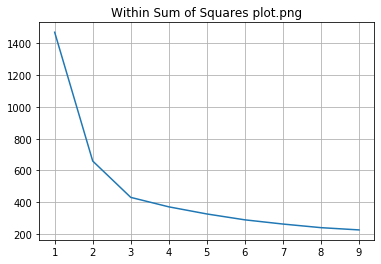

In [64]:
plt.plot(range(1,10), wss)
plt.title('Within Sum of Squares plot.png')
plt.grid()
plt.savefig('q1_Within Sum of Squares plot.png')
plt.show()

In [65]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df2)
labels1 = k_means.labels_
labels1

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [66]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df2)
labels2 = k_means.labels_
labels2

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [67]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [68]:
print(silhouette_score(df3,labels1))
print(silhouette_samples(df3,labels1).min())

0.5225058959449078
-0.16504838621137338


In [69]:
print(silhouette_score(df3,labels2))
print(silhouette_samples(df3,labels2).min())

0.45110742346547716
-0.27372484283698034


In [70]:
DF4 = hierarchial_df

In [71]:
DF4.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,h_cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [72]:
DF4['k_cluster'] = labels2

In [73]:
DF4.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,h_cluster,k_cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0


In [74]:
DF4.to_csv('final_clusters.csv')

# 6.Cluster Profiling

In [75]:
DF4.h_cluster.value_counts().sort_index()

1    70
2    67
3    73
Name: h_cluster, dtype: int64

In [76]:
DF4.k_cluster.value_counts().sort_index()

0    67
1    72
2    71
Name: k_cluster, dtype: int64

In [80]:
clust_profile1=DF4.drop(['k_cluster'],axis=1)
clust_profile1=clust_profile1.groupby('h_cluster').mean()
clust_profile1['Freq']=DF4.h_cluster.value_counts().sort_index()
clust_profile1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
h_cluster,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [81]:
clust_profile2=DF4.drop(['h_cluster'],axis=1)
clust_profile2=clust_profile2.groupby('k_cluster').mean()
clust_profile2['freq']=DF4.k_cluster.value_counts().sort_index()
clust_profile2

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
k_cluster,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


# 7.PROBLEM 2 

In [24]:
data = pd.read_csv('insurance_part2_data.csv')
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [25]:
data.shape

(3000, 10)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [28]:
data.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [29]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [31]:
data.describe(include= 'all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,1.306333,0.612333,0.308000,14.529203,0.984667,70.001333,60.249913,1.661667,0.250000
std,10.463518,0.994060,0.487299,0.461744,25.481455,0.122895,134.053313,70.733954,1.258726,0.575277
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,0.000000,4.630000,1.000000,26.500000,33.000000,2.000000,0.000000
75%,42.000000,2.000000,1.000000,1.000000,17.235000,1.000000,63.000000,69.000000,2.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,210.210000,1.000000,4580.000000,539.000000,4.000000,2.000000


In [32]:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

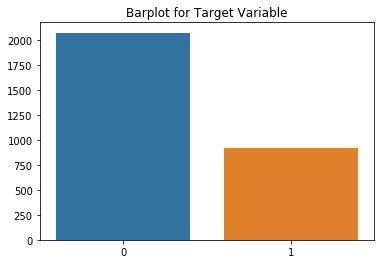

0    0.692
1    0.308
Name: Claimed, dtype: float64


In [33]:
sns.barplot(data.Claimed.value_counts().index,data.Claimed.value_counts().values)
plt.title('Barplot for Target Variable')
plt.savefig('q2_barplot for target variable.png')
plt.show()
print(data.Claimed.value_counts(normalize=True))

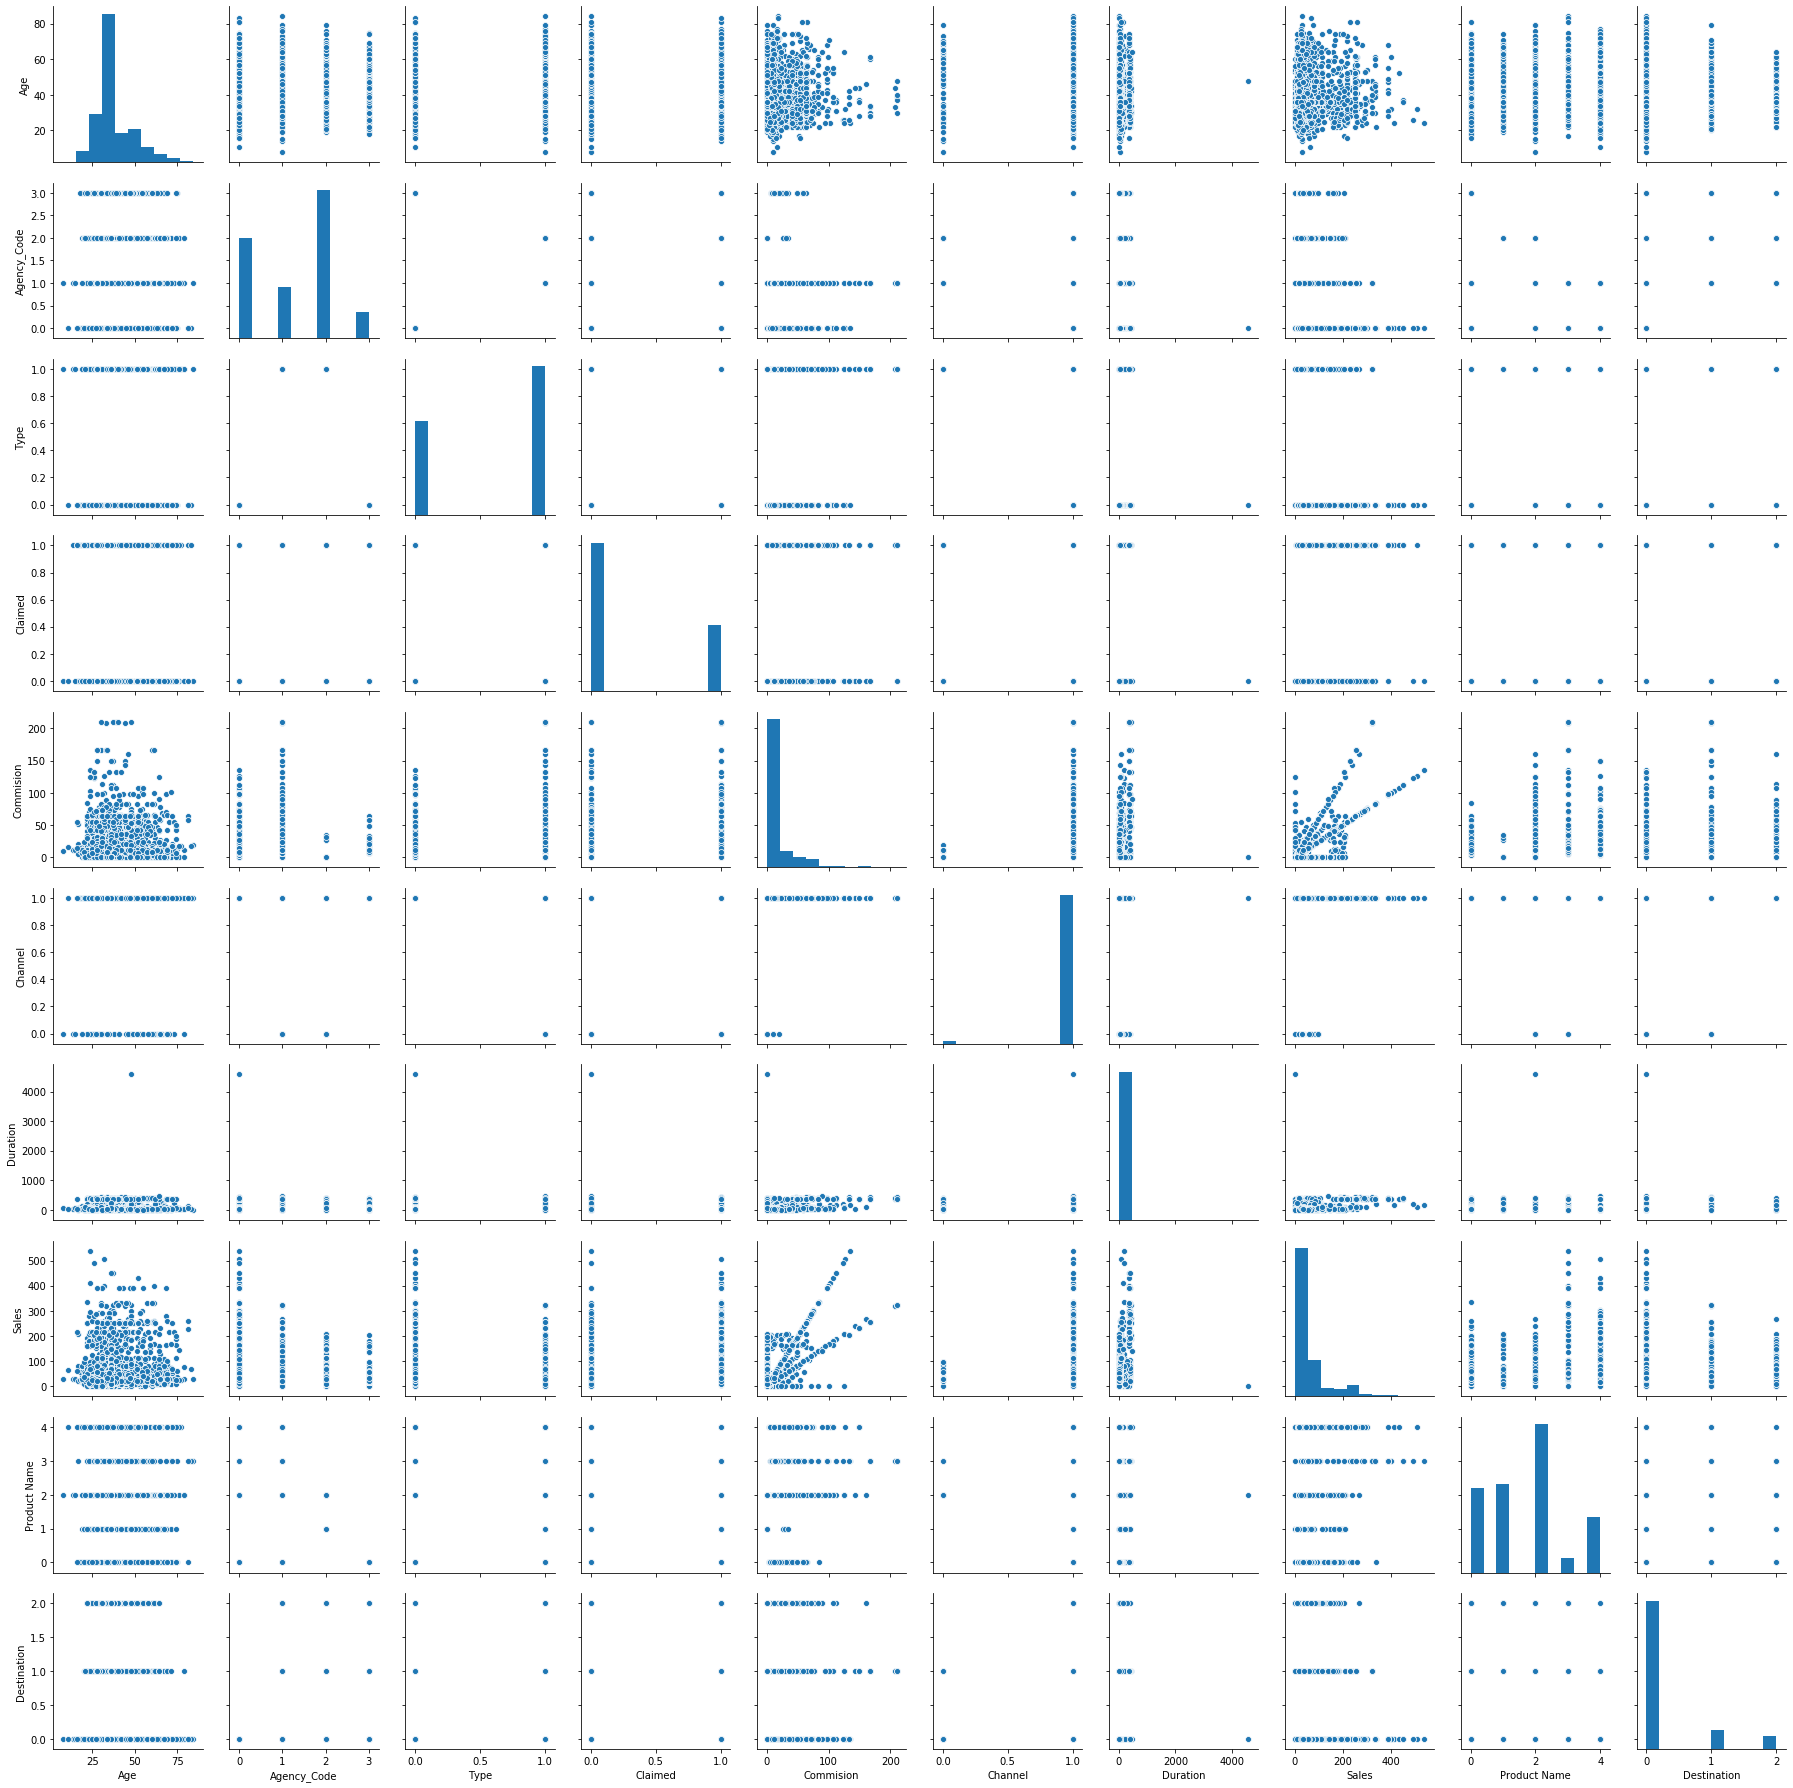

In [158]:
sns.pairplot(data)
plt.savefig('q2_pair plot for dataset.png')

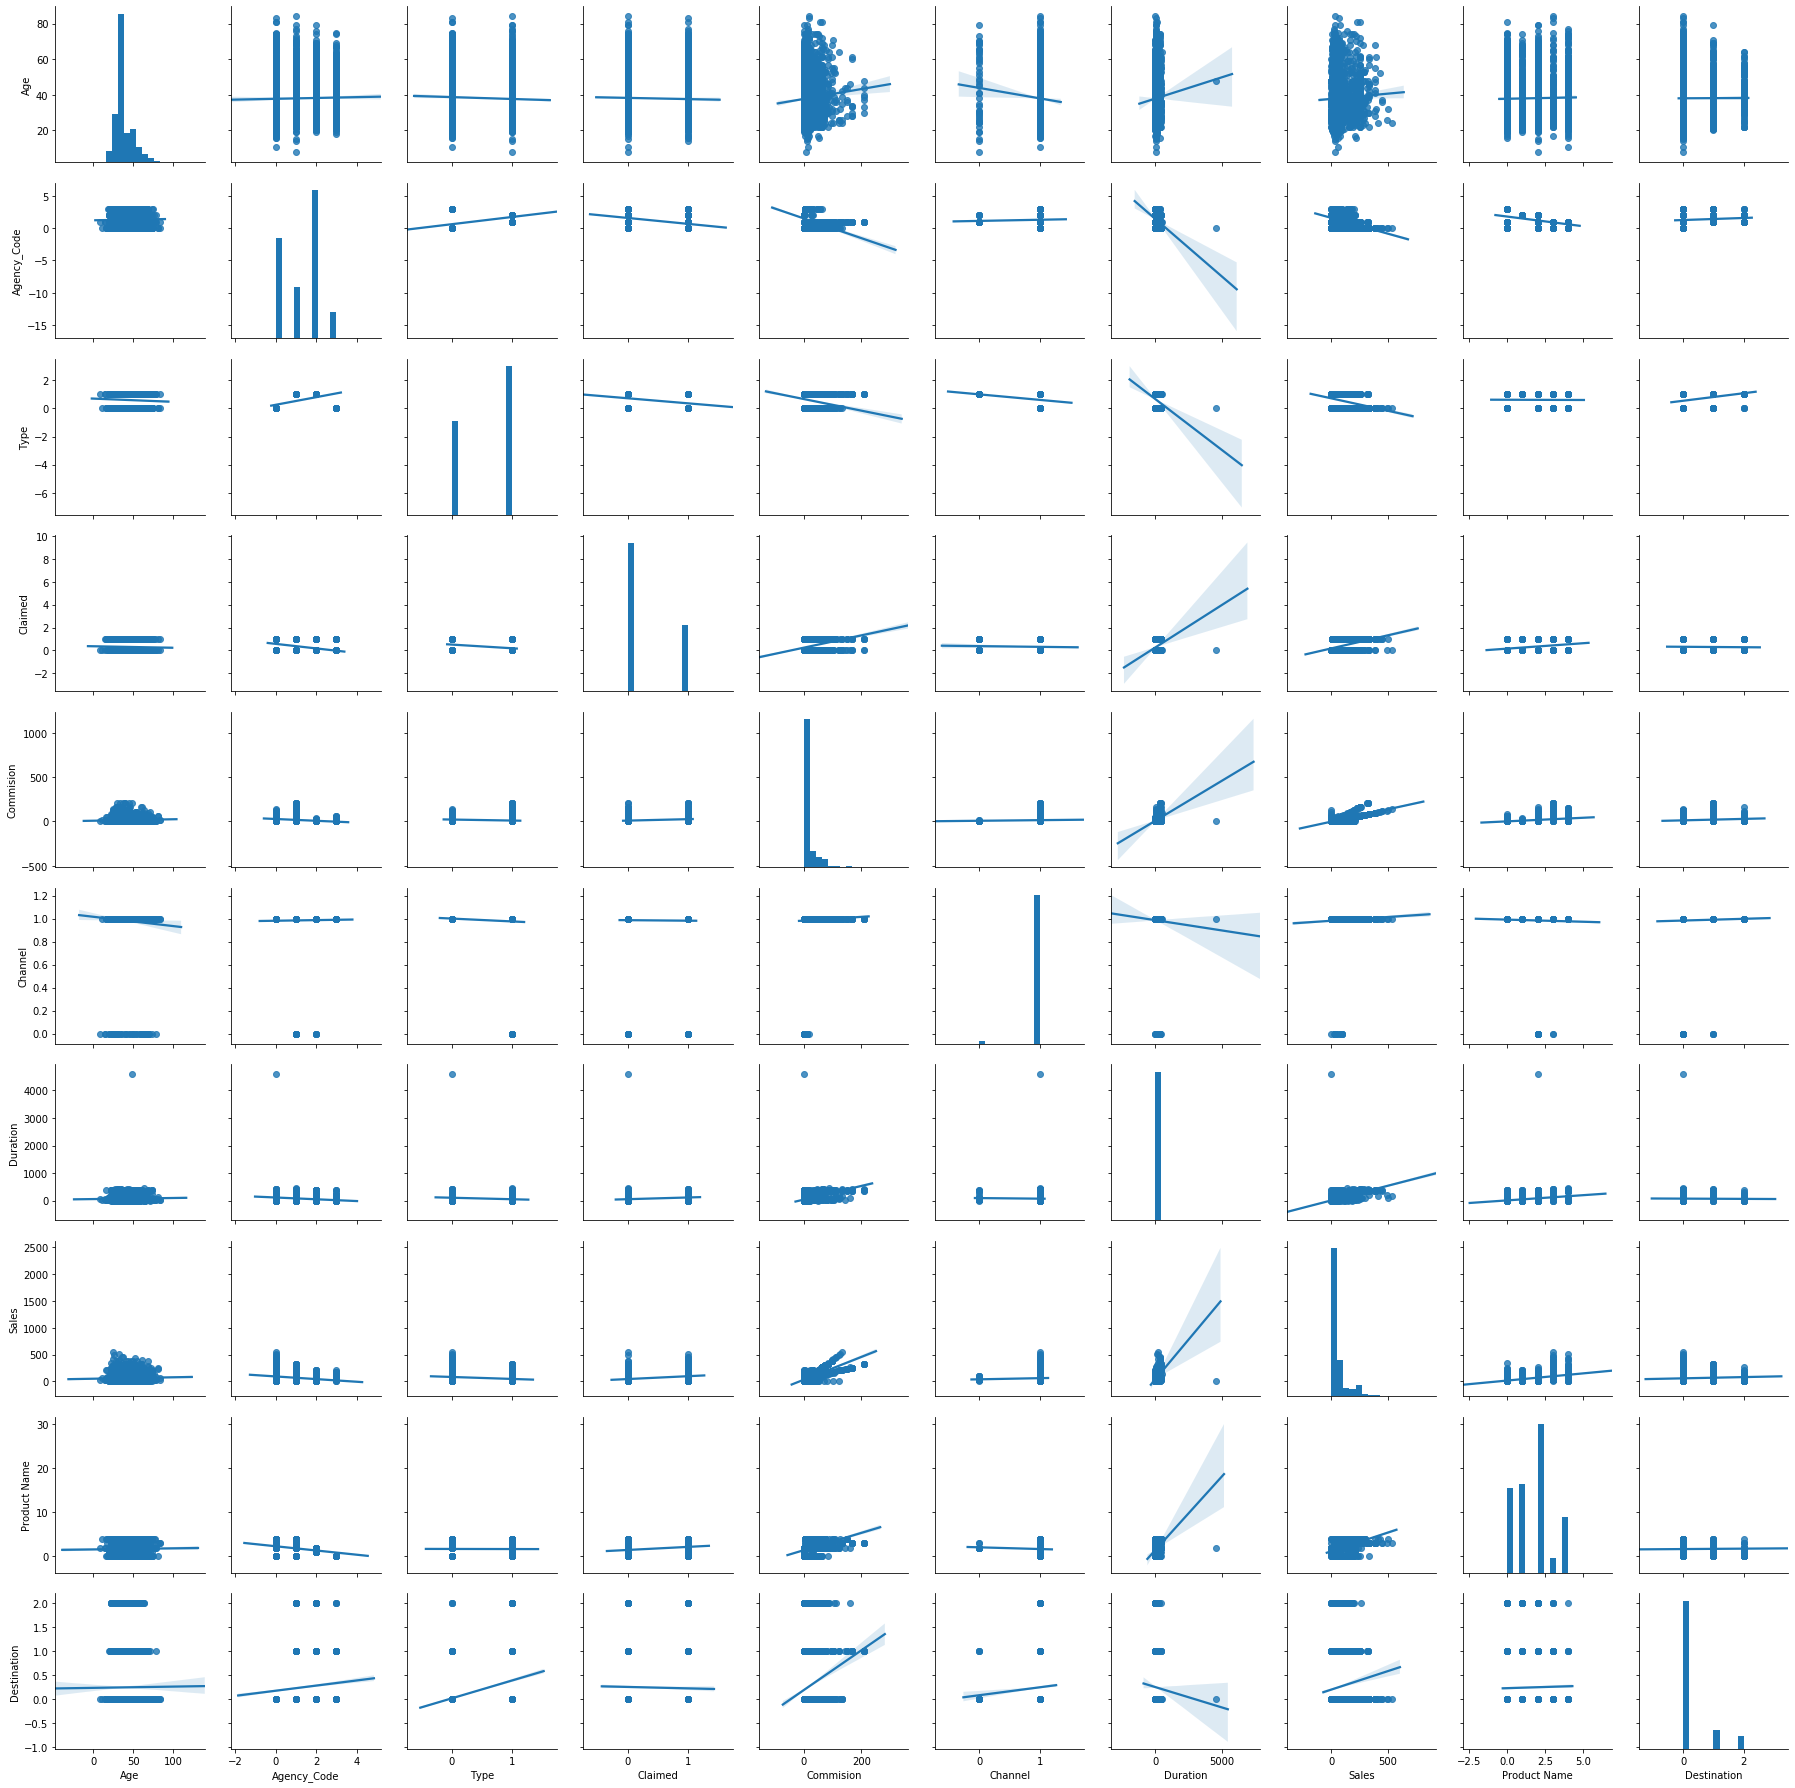

In [159]:
sns.pairplot(data, kind='reg')
plt.savefig('q2_Regression Kind Pair Plot.png')

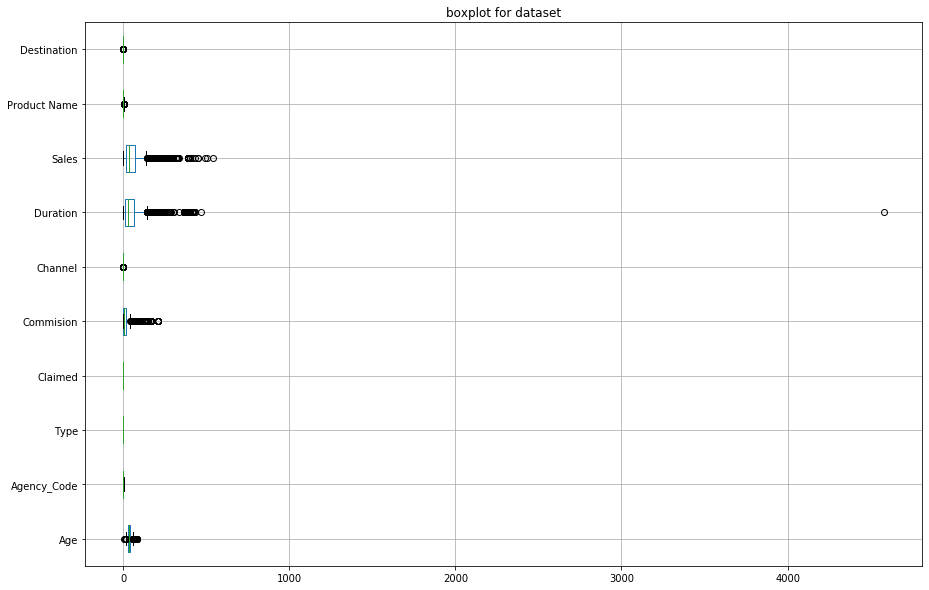

In [34]:
plt.figure(figsize=(15,10))
data.boxplot(vert=0)
plt.title('boxplot for dataset')
plt.savefig('q2_boxplot for dataset.png')

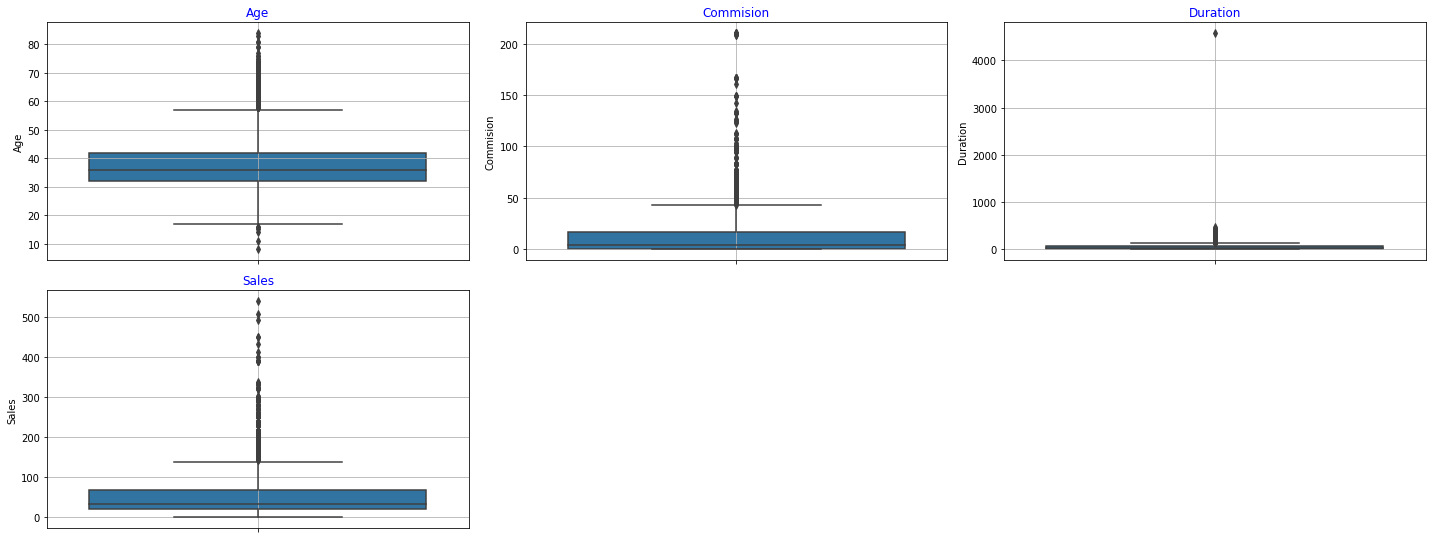

In [35]:
continuous=data.dtypes[(data.dtypes=='int64')|(data.dtypes=='float64')].index
data_plot=data[continuous]
fig=plt.figure(figsize=(20,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()
plt.savefig('q2_boxplot for problem 2.png')

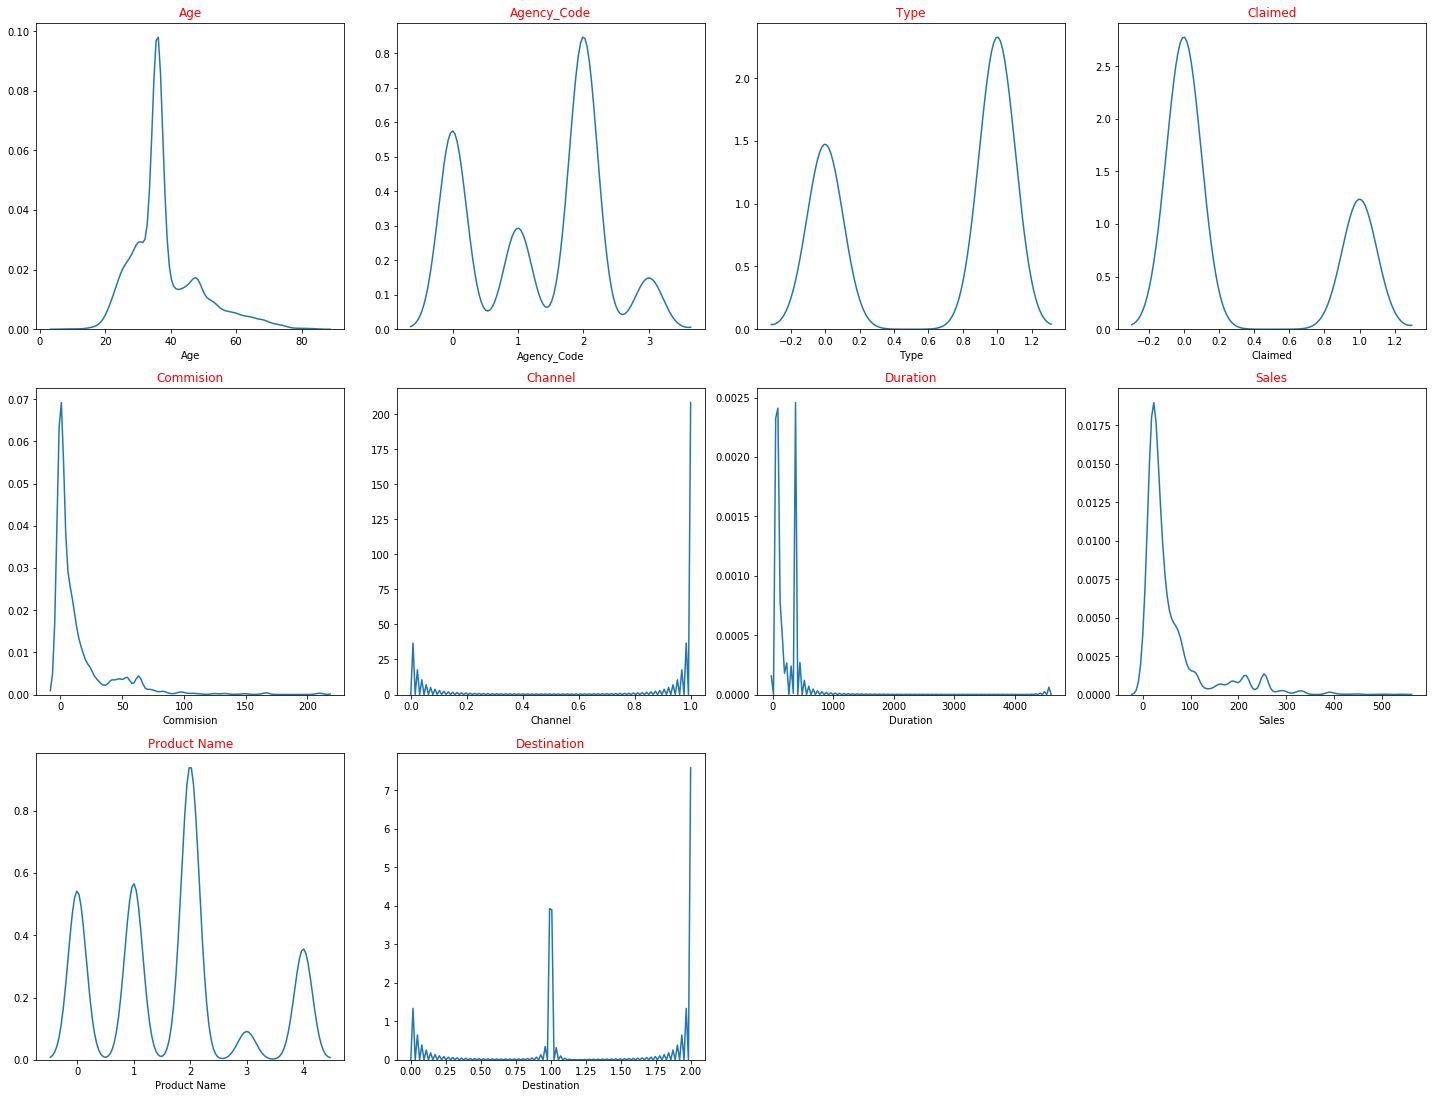

In [36]:
dist_plot=data
fig=plt.figure(figsize=(20,20))
for i in range(0,len(dist_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(dist_plot[dist_plot.columns[i]],hist=False)
    ax.set_title(dist_plot.columns[i],color='Red')
plt.tight_layout()
plt.savefig('q2_distplot for problem 2.png')
plt.show()

In [37]:
data.skew()

Age              1.149713
Agency_Code     -0.155126
Type            -0.461352
Claimed          0.832185
Commision        3.148858
Channel         -7.892734
Duration        13.784681
Sales            2.381148
Product Name     0.432670
Destination      2.188556
dtype: float64

In [66]:
data.cov()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
Age,109.485214,0.228200,-0.249806,-0.145076,18.055091,-0.088634,42.676437,29.201372,0.271879,0.028593
Agency_Code,0.228200,0.988156,0.267511,-0.196750,-9.944227,0.002698,-31.886371,-24.357022,-0.474515,0.052768
Type,-0.249806,0.267511,0.237460,-0.077291,-2.689525,-0.005946,-12.948466,-8.784935,-0.005162,0.088946
Claimed,-0.145076,-0.196750,-0.077291,0.213207,3.500332,-0.000944,13.303357,11.394658,0.149923,-0.006335
Commision,18.055091,-9.944227,-2.689525,3.500332,649.304524,0.105103,1610.204119,1381.552303,12.807423,2.697488
Channel,-0.088634,0.002698,-0.005946,-0.000944,0.105103,0.015103,-0.319419,0.325274,-0.005856,0.002501
Duration,42.676437,-31.886371,-12.948466,13.303357,1610.204119,-0.319419,17970.290762,5299.841484,59.861405,-1.516506
Sales,29.201372,-24.357022,-8.784935,11.394658,1381.552303,0.325274,5299.841484,5003.292182,42.258884,3.835864
Product Name,0.271879,-0.474515,-0.005162,0.149923,12.807423,-0.005856,59.861405,42.258884,1.584392,0.015589
Destination,0.028593,0.052768,0.088946,-0.006335,2.697488,0.002501,-1.516506,3.835864,0.015589,0.330944


In [39]:
data.corr()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
Age,1.000000,0.021939,-0.048992,-0.030027,0.067717,-0.068927,0.030425,0.039455,0.020643,0.004750
Agency_Code,0.021939,1.000000,0.552247,-0.428647,-0.392585,0.022085,-0.239285,-0.346404,-0.379233,0.092274
Type,-0.048992,0.552247,1.000000,-0.343505,-0.216599,-0.099291,-0.198219,-0.254868,-0.008416,0.317289
Claimed,-0.030027,-0.428647,-0.343505,1.000000,0.297498,-0.016641,0.214923,0.348877,0.257951,-0.023851
Commision,0.067717,-0.392585,-0.216599,0.297498,1.000000,0.033563,0.471389,0.766505,0.399306,0.184017
Channel,-0.068927,0.022085,-0.099291,-0.016641,0.033563,1.000000,-0.019389,0.037418,-0.037859,0.035373
Duration,0.030425,-0.239285,-0.198219,0.214923,0.471389,-0.019389,1.000000,0.558930,0.354763,-0.019665
Sales,0.039455,-0.346404,-0.254868,0.348877,0.766505,0.037418,0.558930,1.000000,0.474634,0.094267
Product Name,0.020643,-0.379233,-0.008416,0.257951,0.399306,-0.037859,0.354763,0.474634,1.000000,0.021528
Destination,0.004750,0.092274,0.317289,-0.023851,0.184017,0.035373,-0.019665,0.094267,0.021528,1.000000


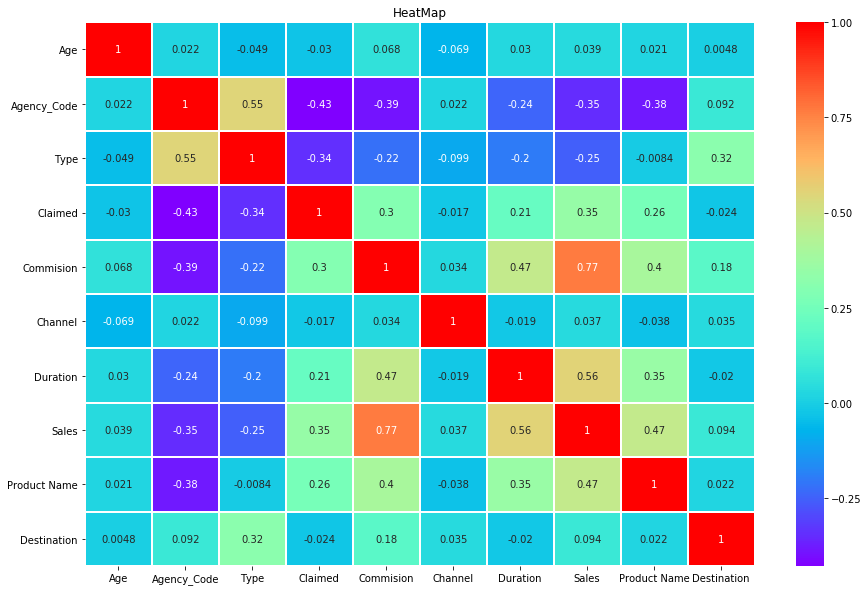

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap = 'rainbow', linewidth='1')
plt.title('HeatMap')
plt.savefig('Heatmap for question 2.png')

# 8.Splitting into Training and Testing Data

In [41]:
X = data.drop(['Claimed'],axis=1)
y = data['Claimed']
X_train, X_test, train_label, test_label = train_test_split(X, y, test_size=0.30, random_state=1)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(train_label.shape)
print(test_label.shape)

(2100, 9)
(900, 9)
(2100,)
(900,)


# 9.Cart Model

In [42]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [43]:
dt_model.fit(X_train, train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [44]:
from sklearn import tree

train_char_label = ['No', 'Yes']
HR_Tree_File = open('d:\hr_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=HR_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

HR_Tree_File.close()

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8, 9, 10, 11],
    'min_samples_leaf': [25, 30, 35, 40, 45],
    'min_samples_split': [75, 90, 105, 120, 135]
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [46]:
grid_search.fit(X_train, train_label)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [7, 8, 9, 10, 11],
                         'min_samples_leaf': [25, 30, 35, 40, 45],
               

In [47]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 35, 'min_samples_split': 135}

In [48]:
dt_model= DecisionTreeClassifier(max_depth=7, min_samples_leaf=35, min_samples_split=135, random_state=1)
dt_model.fit(X_train, train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=135,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

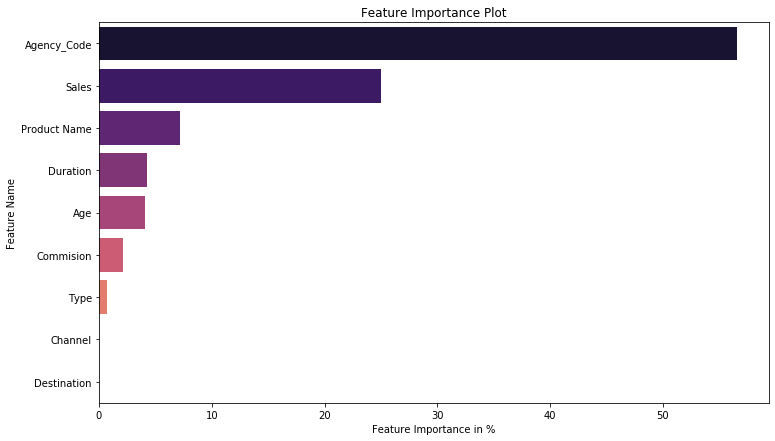

In [49]:
x=pd.DataFrame(dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='magma')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.savefig('q2_Feature Importance of Variables for CART Model.png')
plt.show()

In [50]:
ytrain_predict1 = dt_model.predict(X_train)
ytest_predict1 = dt_model.predict(X_test)

# 10. Report for CART model

In [52]:
confusion_matrix(train_label, ytrain_predict1)

array([[1332,  139],
       [ 282,  347]], dtype=int64)

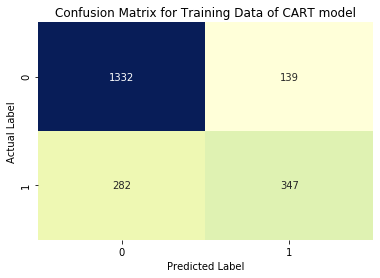

In [53]:
sns.heatmap(confusion_matrix(train_label, ytrain_predict1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Training Data of CART model')
plt.savefig('q2_Confusion Matrix for Training Data of CART model.png')
plt.show()

In [54]:
confusion_matrix(test_label, ytest_predict1)

array([[557,  48],
       [171, 124]], dtype=int64)

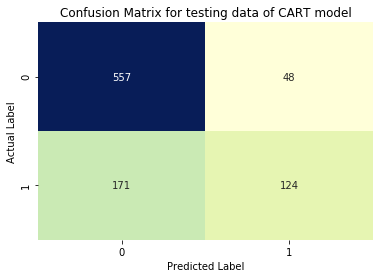

In [55]:
sns.heatmap(confusion_matrix(test_label, ytest_predict1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of CART model')
plt.savefig('q2_Confusion Matrix for testing data of CART model.png')
plt.show()

In [56]:
print(classification_report(train_label, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1471
           1       0.71      0.55      0.62       629

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.74      2100
weighted avg       0.79      0.80      0.79      2100



In [57]:
print(classification_report(test_label, ytest_predict1))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.42      0.53       295

    accuracy                           0.76       900
   macro avg       0.74      0.67      0.68       900
weighted avg       0.75      0.76      0.74       900



In [58]:
dt_model.score(X_train,train_label)

0.7995238095238095

In [59]:
dt_model.score(X_test,test_label)

0.7566666666666667

cart_train_AUC: 0.845


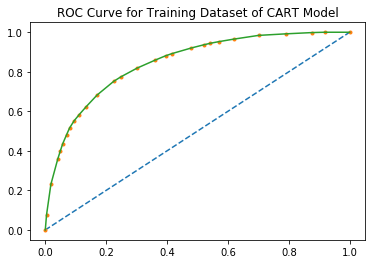

In [60]:
#ROC AUC for training data of CART Model

# predict probabilities
probs = dt_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
cart_train_auc = roc_auc_score(train_label, probs)
print('cart_train_AUC: %.3f' % cart_train_auc)

# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_label, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model\
plt.plot(cart_train_fpr, cart_train_tpr, marker='.', linewidth=0,)
plt.plot(cart_train_fpr, cart_train_tpr)
plt.title('ROC Curve for Training Dataset of CART Model')
plt.savefig('q2_ROC Curve for Training Datset of CART Model.png')

cart_test_AUC: 0.795


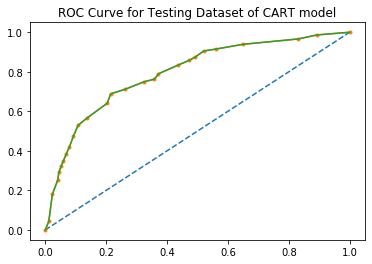

In [61]:
# AUC and ROC for the test data of CART Model

# predict probabilities
probs1 = dt_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]

# calculate AUC
cart_test_auc = roc_auc_score(test_label, probs1)
print('cart_test_AUC: %.3f' % cart_test_auc)

# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_label, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')
plt.plot(cart_test_fpr, cart_test_tpr)
plt.title('ROC Curve for Testing Dataset of CART model')
plt.savefig('q2_ROC Curve for Testing Dataset of CART model.png')

# 11.Random Forest Model

In [62]:
rfcl = RandomForestClassifier(n_estimators = 501, random_state=1)
rfcl = rfcl.fit(X_train, train_label)

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8, 9],
    'max_features': [5, 6, 7],
    'min_samples_leaf': [25, 30, 35, 45],
    'min_samples_split': [75, 90, 105, 135],
    'n_estimators': [301, 401, 501]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [64]:
grid_search.fit(X_train, train_label)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [65]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 7,
 'min_samples_leaf': 25,
 'min_samples_split': 105,
 'n_estimators': 301}

In [85]:
rfcl = RandomForestClassifier(n_estimators = 301, 
                              max_depth=7, 
                              max_features=7, 
                              min_samples_leaf=25, 
                              min_samples_split=105,
                              random_state=1
                                 )
rfcl = rfcl.fit(X_train, train_label)

In [72]:
ytrain_predict2 = rfcl.predict(X_train)
ytest_predict2 = rfcl.predict(X_test)

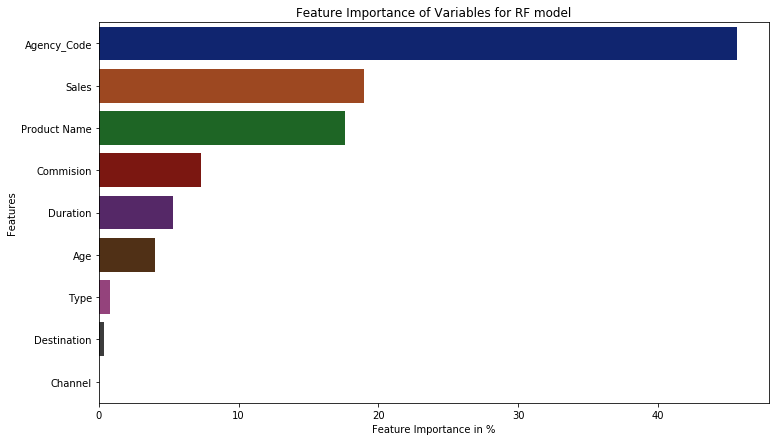

In [73]:
x=pd.DataFrame(rfcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance of Variables for RF model')
plt.savefig('q2_Feature Importance of Variables for RF model.png')
plt.show()

# 12. Report for RFCL model

In [74]:
confusion_matrix(train_label, ytrain_predict2)

array([[1323,  148],
       [ 268,  361]], dtype=int64)

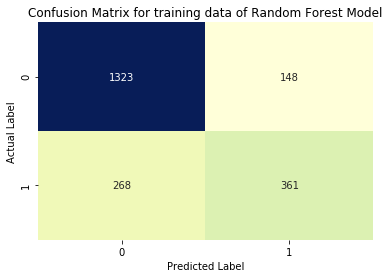

In [75]:
sns.heatmap(confusion_matrix(train_label, ytrain_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of Random Forest Model')
plt.savefig('q2_Confusion  Matrix for training data of RF model')
plt.show()

In [76]:
confusion_matrix(test_label, ytest_predict2)

array([[553,  52],
       [157, 138]], dtype=int64)

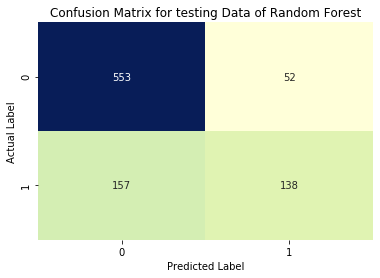

In [77]:
sns.heatmap(confusion_matrix(test_label, ytest_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing Data of Random Forest')
plt.savefig('q2_Confusion Matrix for testing Data of RF model')
plt.show()

In [78]:
print('Classification Report for Training Data of Random Forest')
print(classification_report(train_label, ytrain_predict2))

Classification Report for Training Data of Random Forest
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.71      0.57      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.79      0.80      0.80      2100



In [79]:
print('classification Report for Testing Data of Random Forest')
print(classification_report(test_label, ytest_predict2))

classification Report for Testing Data of Random Forest
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.47      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



In [80]:
rfcl.score(X_train,train_label)

0.8019047619047619

In [81]:
rfcl.score(X_test,test_label)

0.7677777777777778

rfcl_train_AUC: 0.849


Text(0.5, 1.0, 'ROC Curve for Training Data of Random Forest')

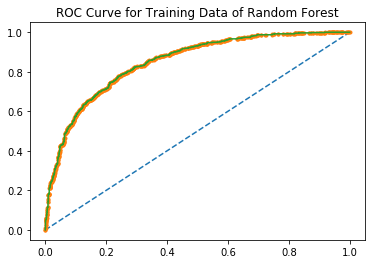

In [82]:
#ROC AUC for training data of rfcl model

# predict probabilities
probs2 = rfcl.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]

# calculate AUC
rfcl_train_auc = roc_auc_score(train_label, probs2)
print('rfcl_train_AUC: %.3f' % rfcl_train_auc)

# calculate roc curve
rfcl_train_fpr, rfcl_train_tpr, rfcl_train_thresholds = roc_curve(train_label, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model\
plt.plot(rfcl_train_fpr, rfcl_train_tpr, marker='.', linewidth=0)
plt.plot(rfcl_train_fpr, rfcl_train_tpr)
plt.title('ROC Curve for Training Data of Random Forest')

rfcl_test_AUC: 0.819


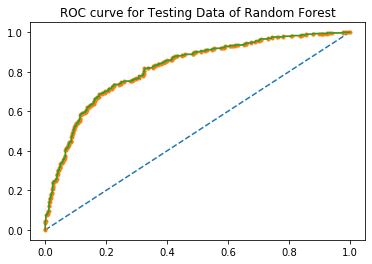

In [83]:
# AUC and ROC for the test data of CART Model

# predict probabilities
probs3 = rfcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs3 = probs3[:, 1]

# calculate AUC
rfcl_test_auc = roc_auc_score(test_label, probs3)
print('rfcl_test_AUC: %.3f' % rfcl_test_auc)

# calculate roc curve
rfcl_test_fpr, rfcl_test_tpr, rfcl_test_thresholds = roc_curve(test_label, probs3)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(rfcl_test_fpr, rfcl_test_tpr, marker='.')
plt.plot(rfcl_test_fpr, rfcl_test_tpr)
plt.title('ROC curve for Testing Data of Random Forest')
plt.savefig('q2_ROC Curve for Testing Data of RF model.png')

# 13. ANN

#  Removing Outliers

In [88]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [89]:
for feature in data[['Sales', 'Duration', 'Commision', 'Age']]: 
    lr,ur=treat_outlier(data[feature])
    data[feature]=np.where(data[feature]>ur,ur,data[feature])
    data[feature]=np.where(data[feature]<lr,lr,data[feature])

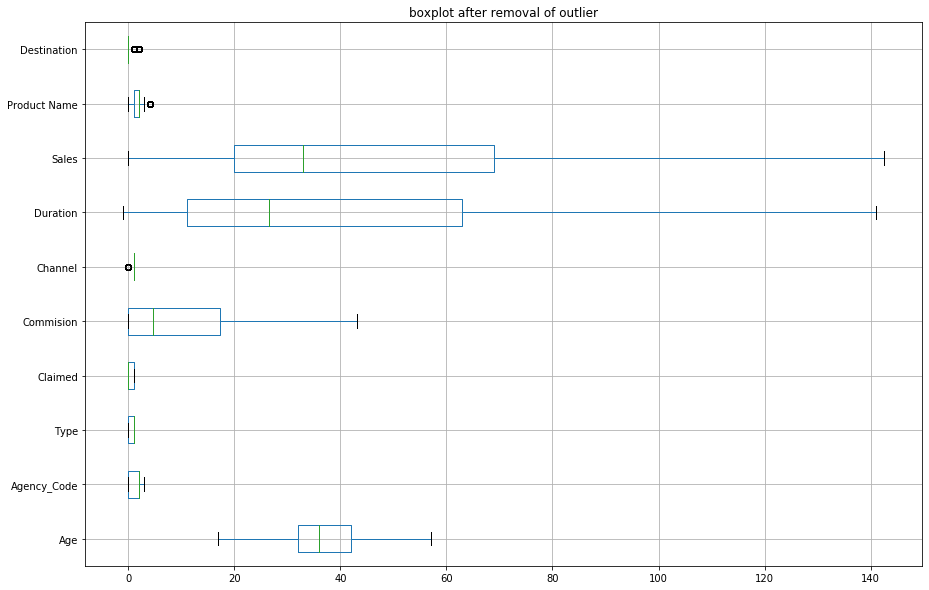

In [90]:
plt.figure(figsize=(15,10))
data.boxplot(vert=0)
plt.title('boxplot after removal of outlier')
plt.savefig('boxplot after removal of outliers.png')

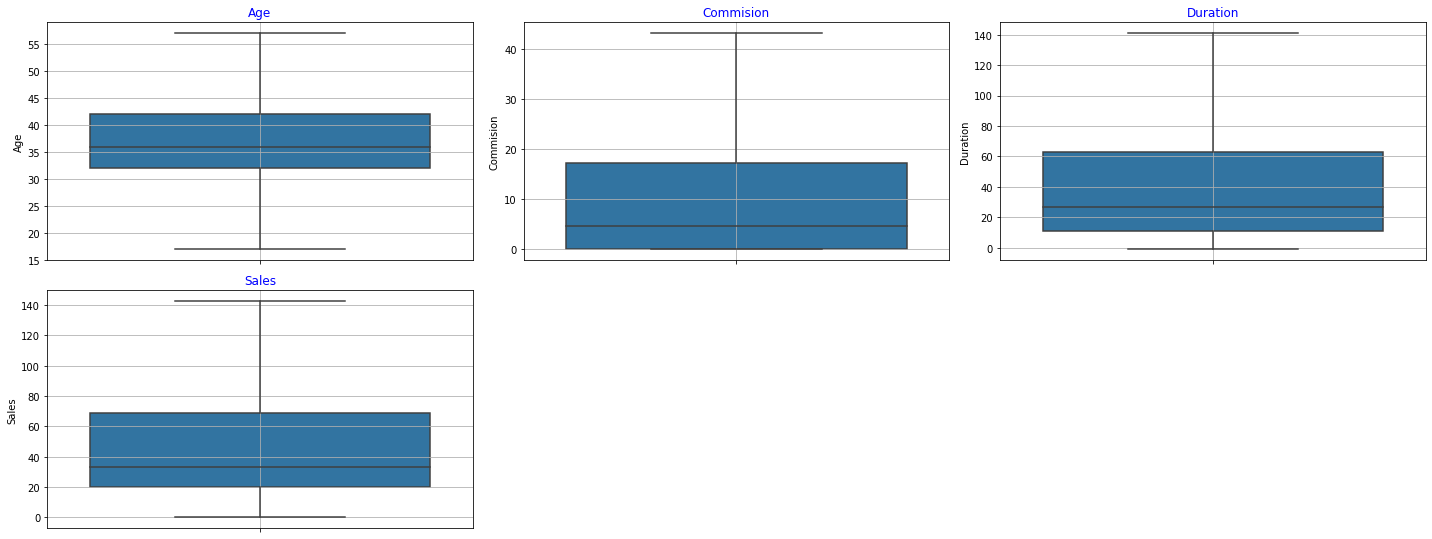

In [91]:
continuous=data.dtypes[(data.dtypes=='int64')|(data.dtypes=='float64')].index
data_plot=data[continuous]
fig=plt.figure(figsize=(20,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

In [92]:
sc = StandardScaler()

In [93]:
X_train = sc.fit_transform(X_train)

In [94]:
X_test = sc.transform(X_test)

In [95]:
mlp = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=1,tol=0.0001)

In [97]:
mlp.fit(X_train, train_label)
y_pred = mlp.predict(X_test)

Iteration 1, loss = 0.73190828
Iteration 2, loss = 0.70481842
Iteration 3, loss = 0.67377712
Iteration 4, loss = 0.64619472
Iteration 5, loss = 0.62272023
Iteration 6, loss = 0.60330223
Iteration 7, loss = 0.58732612
Iteration 8, loss = 0.57422402
Iteration 9, loss = 0.56310704
Iteration 10, loss = 0.55382327
Iteration 11, loss = 0.54599574
Iteration 12, loss = 0.53911673
Iteration 13, loss = 0.53335898
Iteration 14, loss = 0.52839899
Iteration 15, loss = 0.52391237
Iteration 16, loss = 0.51999360
Iteration 17, loss = 0.51649432
Iteration 18, loss = 0.51346008
Iteration 19, loss = 0.51074817
Iteration 20, loss = 0.50822930
Iteration 21, loss = 0.50611255
Iteration 22, loss = 0.50411064
Iteration 23, loss = 0.50233513
Iteration 24, loss = 0.50068786
Iteration 25, loss = 0.49918315
Iteration 26, loss = 0.49790041
Iteration 27, loss = 0.49663449
Iteration 28, loss = 0.49555444
Iteration 29, loss = 0.49443737
Iteration 30, loss = 0.49348316
Iteration 31, loss = 0.49262310
Iteration 32, los

In [98]:
param_grid = {
    'hidden_layer_sizes': [100, 200, 300, (100,100), (200,200), (300,300), (100, 100, 100), (200,200,200) ],
    'activation': ['logistic', 'relu', 'tanh', 'identity' ],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

mlp = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, cv = 3)

In [229]:
grid_search.fit(X_train, train_label)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['logistic', 'relu', 'tanh', 'identity'],
                         'hidden_layer_sizes': [100, 200, 300, (100,

In [230]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (300, 300),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [231]:
best_grid = grid_search.best_estimator_

In [232]:
ytrain_predict3 = best_grid.predict(X_train)
ytest_predict3 = best_grid.predict(X_test)

# 14. Report for ANN Model

In [233]:
confusion_matrix(train_label, ytrain_predict3)

array([[1290,  181],
       [ 266,  363]], dtype=int64)

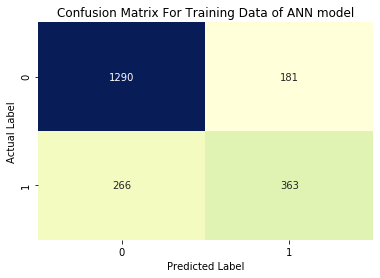

In [235]:
sns.heatmap(confusion_matrix(train_label, ytrain_predict3),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix For Training Data of ANN model')
plt.savefig('q2_Confusion Matrix For Training Data of ANN model.png')
plt.show()

In [236]:
confusion_matrix(test_label, ytest_predict3)

array([[545,  60],
       [147, 148]], dtype=int64)

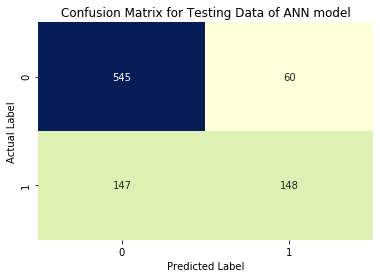

In [239]:
sns.heatmap(confusion_matrix(test_label, ytest_predict3),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testing Data of ANN model')
plt.savefig('q2_Confusion Matrix for Testing Data of ANN model.png')
plt.show()

In [240]:
print('classification report for training data of ANN Model ')
print(classification_report(train_label, ytrain_predict3))

classification report for training data of ANN Model 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.58      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [241]:
print('classification report for Testing Data of ANN Model')
print(classification_report(test_label, ytest_predict3))

classification report for Testing Data of ANN Model
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       605
           1       0.71      0.50      0.59       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [242]:
best_grid.score(X_train,train_label)

0.7871428571428571

In [243]:
best_grid.score(X_test,test_label)

0.77

ANN_train_AUC: 0.838


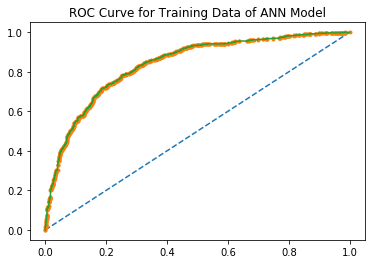

In [245]:
#ROC AUC for training data of ann model

# predict probabilities
probs4 = best_grid.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs4 = probs4[:, 1]

# calculate AUC
ANN_train_auc = roc_auc_score(train_label, probs4)
print('ANN_train_AUC: %.3f' % ANN_train_auc)

# calculate roc curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(train_label, probs4)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model\
plt.plot(ann_train_fpr, ann_train_tpr, marker='.', linewidth=0)
plt.plot(ann_train_fpr, ann_train_tpr)
plt.title('ROC Curve for Training Data of ANN Model')
plt.savefig('q2_ROC Curve for Training Data of ANN Model.png')

ann_test_AUC: 0.814


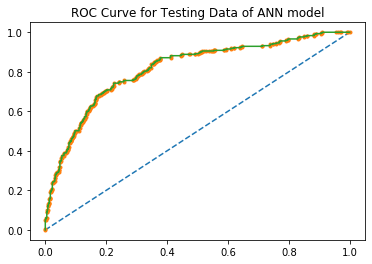

In [247]:
#ROC AUC for testing data of ann model

# predict probabilities
probs5 = best_grid.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs5 = probs5[:, 1]

# calculate AUC
ann_test_auc = roc_auc_score(test_label, probs5)
print('ann_test_AUC: %.3f' % ann_test_auc)

# calculate roc curve
ann_test_fpr, ann_test_tpr, ann_test_thresholds = roc_curve(test_label, probs5)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model\
plt.plot(ann_test_fpr, ann_test_tpr, marker='.', linewidth=0)
plt.plot(ann_test_fpr, ann_test_tpr)
plt.title('ROC Curve for Testing Data of ANN model')
plt.savefig('q2_ROC Curve for Testing Data of ANN model.png')